# TITANIC SURVIVAL CHALLENGE

**In-Order to make Classifier,we are required to `pre-process the data` into suitable form which `algorithm can understand` and
will have `low redundancy` **

In [1]:
#Dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
PARENT_ID="datasets\\titanic"
ROOT_ID=["train_titanic_data.csv","test_titanic_data.csv"]


def fetch_data(root,parent="."):
    path=os.path.join(parent,root)
    return pd.read_csv(path)

dtrain=fetch_data(ROOT_ID[0],PARENT_ID)
dtest=fetch_data(ROOT_ID[1],PARENT_ID)

In [3]:
print(dtrain.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


# Preprocessing 
** 1. Data Cleaning **

In [4]:
dtrain.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
#filling missing values
def fill_median(data,col,copy=False):
    df=data
    if copy is True:
        df=data.copy()
    med=df[col].median()
    df[col]=df[col].fillna(med)
    
    return df,med

def fill_default(data,col,value=0,copy=False):
    df=data
    if copy is True:
        df=data.copy()
    df[col].fillna(val)
    return df,val

#Add new columns

def add_column(data,col,value,copy=False):
    df=data
    if copy is True:
        df=data.copy()
    df.assign(col=value)

In [6]:
for feature in dtrain.columns:
    print(feature,dtrain[ dtrain[feature].isnull() ].shape[0],sep="\t"
          ,end="\n")  #It is much better to remove missing data

PassengerId	0
Survived	0
Pclass	0
Name	0
Sex	0
Age	177
SibSp	0
Parch	0
Ticket	0
Fare	0
Cabin	687
Embarked	2


In [7]:
#Removing Uncessary Columns i.e Attributes like Cabin,Ticket and PassengerId
def drop_column(data,columns,copy=False):
    df=data
    if copy is True:
        df=data.copy()
        
    for i in columns:
        df.drop(i,axis=1,inplace=True)
    return df

dtrain=drop_column(dtrain,columns=["Cabin","Ticket","PassengerId","Name"])
dtrain.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [8]:
dtrain=dtrain.dropna(axis=0,how="any",inplace=False)
dtrain.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [9]:
dtrain[ dtrain["Age"].isnull() ]  #Now their is no nan values in age

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


** `2. Encode Categorical Data `**

In [10]:
#Encoding Categorical Data into Numeric Data
from sklearn.preprocessing import LabelEncoder
def encode_category(data,col,copy=False):
    X=data
    if copy is True:
        X=data.copy()
    lb_make = LabelEncoder()
    X[col] = lb_make.fit_transform(X[col])
    return X


dtrain=encode_category(dtrain,col="Sex")
dtrain=encode_category(dtrain,col="Embarked")
dtrain.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
6,0,1,1,54.0,0,0,51.8625,2
7,0,3,1,2.0,3,1,21.0750,2
8,1,3,0,27.0,0,2,11.1333,2
9,1,2,0,14.0,1,0,30.0708,0
10,1,3,0,4.0,1,1,16.7000,2


In [13]:
for feature in dtrain.columns:
    print(feature,dtrain[ dtrain[feature].isnull() ].shape[0],sep="\t"
          ,end="\n")  #It is much better to remove missing data
print(dtrain.shape)

Survived	0
Pclass	0
Sex	0
Age	0
SibSp	0
Parch	0
Fare	0
Embarked	0
(712, 8)


**``3. Create Train and Test Set``**

In [16]:
X=dtrain[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]

y=dtrain[["Survived"]]

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.1,random_state=45)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
#NORMALIZATION
def min_max(data):
    limit=data.min(),data.max()
    data=( data-limit[0] )/ (limit[1] - limit[0])
    return data

In [20]:
from sklearn.metrics import accuracy_score,f1_score

def score(y,y_):
    acc=round(accuracy_score(y_,y)*100,3)
    f1=round(f1_score(y_,y)*100,3)
    return acc,f1

def to_categorical(y):
    z=pred.mean()
    y[y > z ]=1
    y[y < z ]=0
    return y


# **`1. LINEAR REGRESSION`**

In [23]:
clf=LinearRegression()
clf.fit(xtrain,ytrain)

y_=clf.predict(xtest)
# when we try to find accuracy on y_ and ytest
# ValueError: Classification metrics can't handle a mix of binary and continuous targets

#we need to convert prediction into binary targets
pred1=min_max(y_.copy())

z=pred1.mean()
pred1[pred1 > z ]=1
pred1[pred1 < z ]=0
#(0.8055555555555556, 0.75)

# **`2. Decision Tree Classifier  `**

In [24]:
tree_clf=DecisionTreeClassifier(criterion='gini',random_state=42)
tree_clf.fit(xtrain,ytrain)
pred2=tree_clf.predict(xtest)

#(0.6944444444444444, 0.576923076923077)  --- accuracy and f1 score

# **`3. Random Forest Classifier with  5 estimators`**

In [25]:
rf_clf=RandomForestClassifier(n_estimators=5,random_state=42)
rf_clf.fit(xtrain,ytrain)
pred3=rf_clf.predict(xtest)


#(0.7916666666666666, 0.7169811320754716)   --- accuracy and f1 score

C:\Users\Sachin Bisht\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


# **`4. K- Nearest Neighbors`**

In [26]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,weights="distance")
knn.fit(xtrain,ytrain)
pred4=knn.predict(xtest)


# (0.6388888888888888, 0.5517241379310345) ---- accuracy and f1 score

C:\Users\Sachin Bisht\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


**`5.Performance Measure`**

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score

def performance_measure(y,y_,metrics=[confusion_matrix]):
    measures=[]
    for measure in metrics:
        measures.append(measure(y,y_))
    return measures
        

In [28]:
performance_measure(ytest,pred1,[confusion_matrix,precision_score,recall_score])

[array([[37,  8],
        [ 6, 21]], dtype=int64), 0.7241379310344828, 0.7777777777777778]

In [29]:
from sklearn.metrics import precision_recall_curve
precision,recalls,threshold=precision_recall_curve(ytest,pred1)


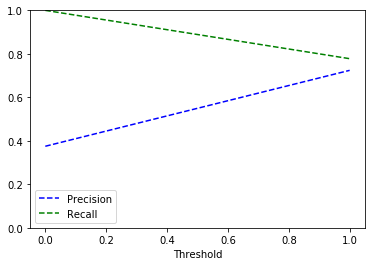

In [30]:
def plot_precision_recall_vs_threshold(precision,recalls,threshold):
    plt.plot(threshold,precision[:-1],'b--',label="Precision")
    plt.plot(threshold,recalls[:-1],"g--",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="best")
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precision,recalls,threshold)
plt.show()

**`5. Visualization`**

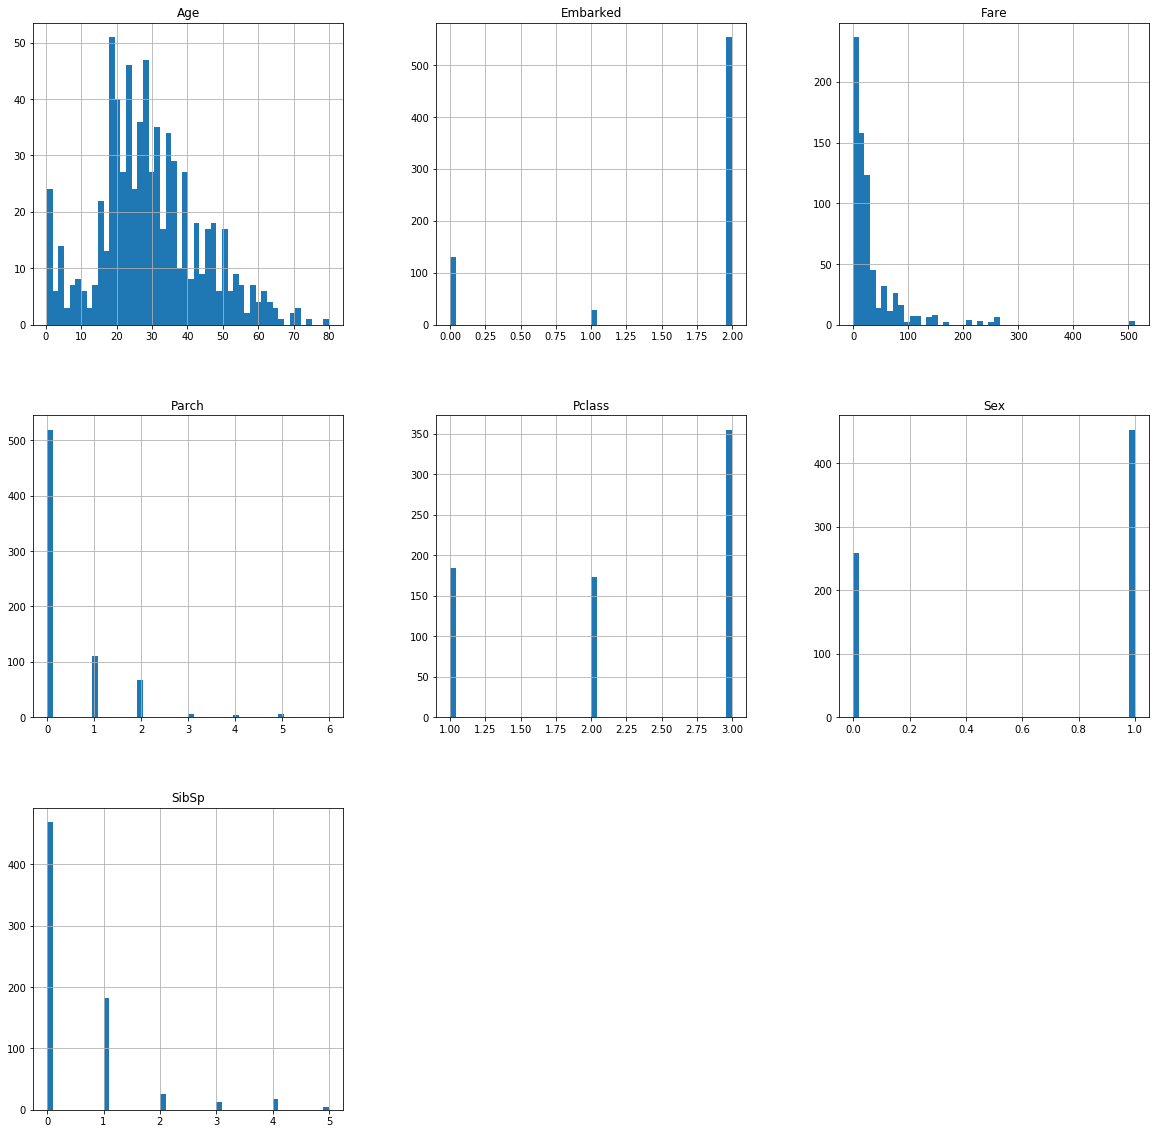

In [32]:
X.hist(bins=50,figsize=(20,20))
plt.show()

# **`Creating Pipeline for test data `**

In [33]:
for feature in dtest.columns:
    print(feature,dtest[ dtest[feature].isnull() ].shape[0],sep="\t"
          ,end="\n")  #It is much better to remove missing data

PassengerId	0
Pclass	0
Name	0
Sex	0
Age	86
SibSp	0
Parch	0
Ticket	0
Fare	1
Cabin	327
Embarked	0


In [34]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")


In [35]:
X_=drop_column(dtest.copy(),columns=["Cabin","Ticket","PassengerId","Name"])
X_=encode_category(X_,col="Sex")
X_=encode_category(X_,col="Embarked")

In [67]:
def find_nan(dtest):
    for feature in dtest.columns:
        print(feature,dtest[ dtest[feature].isnull() ].shape[0],sep="\t"
          ,end="\n")  #It is much better to remove missing data

find_nan(X_.copy())
X_.shape

Pclass	0
Sex	0
Age	0
SibSp	0
Parch	0
Fare	0
Embarked	0


(418, 7)

In [68]:
#Filling 
mean_=X_["Age"].mean(),X_["Fare"].mean()
X_[ X_["Age"].isnull() ] =mean_[0]
X_[ X_["Fare"].isnull() ] =mean_[1]


In [69]:
find_nan(X_.copy())

Pclass	0
Sex	0
Age	0
SibSp	0
Parch	0
Fare	0
Embarked	0


In [107]:
y_=clf.predict(X_)
pred1=min_max(y_.copy())

z=pred1.mean()
pred1[pred1 > z ]=1
pred1[pred1 < z ]=0
pred1=pred1.astype(np.int64)

In [108]:
temp=dtest.assign(Survived=pred1)

In [111]:
temp.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1


In [112]:
op=pd.DataFrame(temp,columns=['PassengerId','Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked'])

In [113]:
op.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,1,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [119]:
#Saving Output to file .csv
op.to_csv("datasets\\titanic\\prediction_reg.csv")

_=pd.read_csv("datasets\\titanic\\prediction_reg.csv")


# **`END`**